In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import cv2
from scipy import misc, ndimage
import matplotlib.pyplot as plt

In [2]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

In [3]:
# Data Augmentation to increase image dataset

# Performing 180 degree rotation on images passed
def random_rotation(image_array: ndarray):
    return sk.transform.rotate(image_array, 180)

# Introducing noise in the images passed
def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

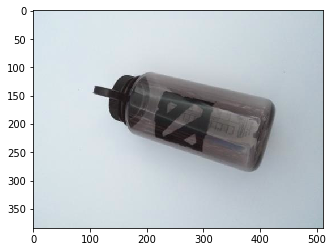

In [4]:
# Reading first image

img = cv2.imread('dataset\\plastic\\plastic1.jpg')
plt.imshow(img)

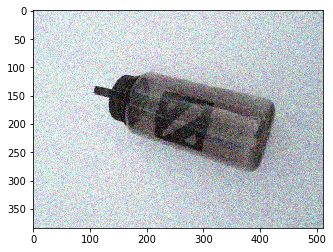

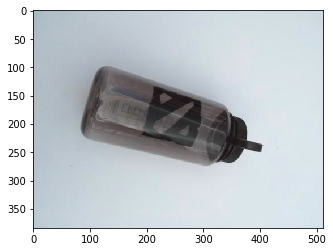

In [5]:
# Performing transformations on first image

img1 = random_noise(img)
plt.imshow(img1)
plt.show()

img1 = random_rotation(img)
plt.imshow(img1)
plt.show()

In [8]:
# Performing transformations on all the images of the dataset

items = ['plastic','metal','glass', 'cardboard', 'paper']
for x in items:
    for i in range(1,401):
        # Reading image
        img = cv2.imread('dataset\\'+x+'\\'+x+str(i)+'.jpg')
        
        img1 = random_noise(img)
        img1 = img1 * 255
        # Saving transformed image
        cv2.imwrite('dataset\\'+x+'\\'+x+str(400+i)+'.jpg',img1)

        img1 = random_rotation(img)
        img1 = img1 * 255
        # Saving transformed image
        cv2.imwrite('dataset\\'+x+'\\'+x+str(800+i)+'.jpg',img1)
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [9]:
# Reading final dataset to calculate histograms of each image

dataList = []
items = ['plastic','metal','glass', 'cardboard', 'paper']
for x in items:
    for i in range(1,1201):
        img = cv2.imread('dataset\\'+x+'\\'+x+str(i)+'.jpg')
        # Converting image to black & white
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Reducing image size
        img_new = misc.imresize(img, (28, 28))
        # Calculating histograms
        hist = cv2.calcHist([img_new],[0],None,[256],[0,256])
        # Appending hist to dataList for classification
        dataList.append(hist)

C:\Users\keshav\Anaconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [10]:
# Converting dataList to a DataFrame

k = np.array(dataList)
k = k.reshape(6000,256)
df1 = pd.DataFrame(k)

In [14]:
# Adding labels to dataframe
df1['labels'] = pd.Series(np.zeros(6000), index=df1.index)
df1.iloc[:1200,-1]='plastic'
df1.iloc[1200:2400,-1]='metal'
df1.iloc[2400:3600,-1]='glass'
df1.iloc[3600:4800,-1]='cardboard'
df1.iloc[4800:6000,-1]='paper'

# Shuffling rows of dataframe
df1 = df1.sample(frac=1).reset_index(drop=True)

# Saving dataframe
df1.to_csv('hist.csv',index=None)